## Project Summary 
-- Your goal ifor this project if to create an Artificial Neural Network that will use the OPEN for the  Capital Markets and Volatility to predict the ClOSE for the 10 year Treasury (20 year tome frame)
-- Does these markes provide predictive insites on the the 10 Year Treasury Yield? 
-- How is the model impacted with the addition of Volitily, GOLD, OIL etc

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [92]:
capital_tickers = ["^GSPC","^DJI", "^IXIC","^RUT"]
## "CL=F", "GC=F","SI=F","EURUSD=X"

In [93]:
capital_data = pd.DataFrame()

In [94]:
for t in capital_tickers:
    capital_data[t] = web.DataReader(t, data_source="yahoo", start = "2000-1-1")["Open"]

In [95]:
capital_data

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
2000-01-03,1469.250000,11501.849609,4186.189941,504.760010
2000-01-04,1455.219971,11349.750000,4020.000000,497.049988
2000-01-05,1399.420044,10989.370117,3854.350098,478.380005
2000-01-06,1402.109985,11113.370117,3834.439941,478.829987
2000-01-07,1403.449951,11247.059570,3711.090088,475.339996
...,...,...,...,...
2020-10-13,3534.010010,28764.949219,11901.759766,1647.569946
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005


## Checking for missing Data
- Below we can see there is data missing from a few features so we ill need to take that into consideration when training our model

In [96]:
capital_data.isnull().sum()

^GSPC    0
^DJI     0
^IXIC    0
^RUT     1
dtype: int64

In [97]:
capital_data.corr()

,^GSPC,^DJI,^IXIC,^RUT
^GSPC,1.000000,0.991879,0.983104,0.956752
^DJI,0.991879,1.000000,0.967478,0.970492
^IXIC,0.983104,0.967478,1.000000,0.914772
^RUT,0.956752,0.970492,0.914772,1.000000


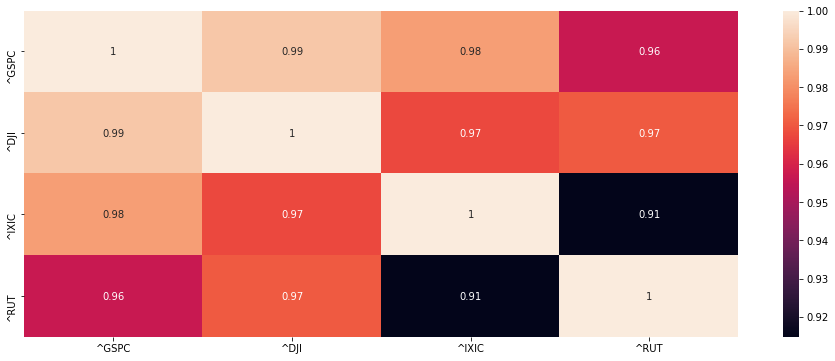

In [98]:
plt.figure(figsize=(16,6))
sns.heatmap(capital_data.corr(), annot=True)

## Putting the data Together
- Now that the data is ready the Capital Markets we need the close for the 10 Year

In [99]:
tenYearData = web.DataReader("^TNX", data_source="yahoo", start= "2001-1-1")["Adj Close"]

### Combining the Data 
- adding the 10 year ADJ Close data to the Capital Markets data set
- This will be our working Data

In [100]:
working_data = pd.concat([capital_data, tenYearData], axis=1)

In [101]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,Adj Close
Date,,,,,
2000-01-03,1469.250000,11501.849609,4186.189941,504.760010,NaN
2000-01-04,1455.219971,11349.750000,4020.000000,497.049988,NaN
2000-01-05,1399.420044,10989.370117,3854.350098,478.380005,NaN
2000-01-06,1402.109985,11113.370117,3834.439941,478.829987,NaN
2000-01-07,1403.449951,11247.059570,3711.090088,475.339996,NaN
...,...,...,...,...,...
2020-10-13,3534.010010,28764.949219,11901.759766,1647.569946,0.727
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,0.722
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005,0.731


### Analyzing the Data 
- Currently we see there is missing data we need to consider removing
- lets see how to go about this
- First lets fix the columns 

In [102]:
working_data.columns

Index(['^GSPC', '^DJI', '^IXIC', '^RUT', 'Adj Close'], dtype='object')

In [103]:
working_data.columns = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^TNX Adj Close']

### Handling missing data
- ^TNX has 288 days missing form the total 5232 days
- approximately 5% of the data so this is not siginificate to mak a huge diffference so will drop these days

In [104]:
working_data.isnull().sum()

^GSPC               0
^DJI                0
^IXIC               0
^RUT                1
^TNX Adj Close    288
dtype: int64

In [105]:
working_data.dropna(inplace=True)

In [106]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,^TNX Adj Close
Date,,,,,
2001-01-02,1320.280029,10790.919922,2474.159912,483.549988,4.917
2001-01-03,1283.270020,10637.419922,2254.560059,462.489990,5.097
2001-01-04,1347.560059,10944.940430,2593.959961,484.390015,5.013
2001-01-05,1333.339966,10912.809570,2573.110107,477.200012,4.948
2001-01-08,1298.349976,10658.730469,2388.719971,463.140015,4.897
...,...,...,...,...,...
2020-10-13,3534.010010,28764.949219,11901.759766,1647.569946,0.727
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,0.722
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005,0.731


### 10 Year activity over time
- Since late 2009 ther has been a stedy decline in the 10 year yield

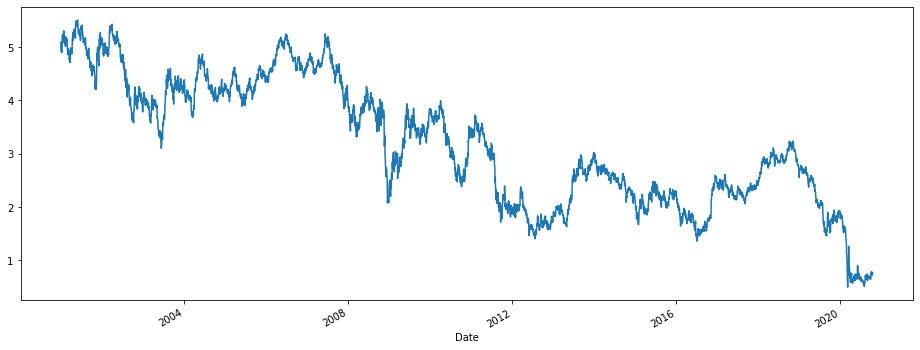

In [107]:
working_data["^TNX Adj Close"].plot(figsize = (16,6))

### Preparing the data for model
- Separating X - > Features and y - > Target (TNX)

In [108]:
X = working_data.drop("^TNX Adj Close", axis= 1).values
y = working_data["^TNX Adj Close"].values

### Training testing and splitting

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Scaling the data to a normal Distribution

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scalar = MinMaxScaler()

In [113]:
X_train = scalar.fit_transform(X_train)

In [114]:
X_test = scalar.transform(X_test)

### Early Stopping Callback
- Will use early stopping to prevent overtraining on the training data 

In [115]:
from tensorflow.keras.callbacks import EarlyStopping

In [116]:
stop = EarlyStopping("val_loss", mode="min", patience= 20)

## Creating the model

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [118]:
model = Sequential()
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))
model.compile(activation = 'adam', loss = "mse")

In [119]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=350, callbacks=[stop])

Train on 3460 samples, validate on 1484 samples
Epoch 1/350
3460/3460 [==============================] - 2s 668us/sample - loss: 9.4526 - val_loss: 7.4964
Epoch 2/350
3460/3460 [==============================] - 0s 137us/sample - loss: 5.1373 - val_loss: 3.6053
Epoch 3/350
3460/3460 [==============================] - 0s 133us/sample - loss: 2.9828 - val_loss: 2.6285
Epoch 4/350
3460/3460 [==============================] - 0s 131us/sample - loss: 2.2065 - val_loss: 1.8890
Epoch 5/350
3460/3460 [==============================] - 0s 132us/sample - loss: 1.6245 - val_loss: 1.3819
Epoch 6/350
3460/3460 [==============================] - 0s 131us/sample - loss: 1.1918 - val_loss: 0.9839
Epoch 7/350
3460/3460 [==============================] - 0s 134us/sample - loss: 0.8943 - val_loss: 0.7875
Epoch 8/350
3460/3460 [==============================] - 0s 132us/sample - loss: 0.7684 - val_loss: 0.7370
Epoch 9/350
3460/3460 [==============================] - 0s 138us/sample - loss: 0.7340 - val_lo

3460/3460 [==============================] - 0s 131us/sample - loss: 0.3097 - val_loss: 0.2812
Epoch 77/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.3065 - val_loss: 0.2794
Epoch 78/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.3057 - val_loss: 0.2751
Epoch 79/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.3046 - val_loss: 0.2739
Epoch 80/350
3460/3460 [==============================] - 0s 131us/sample - loss: 0.3014 - val_loss: 0.2867
Epoch 81/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.3004 - val_loss: 0.2825
Epoch 82/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2985 - val_loss: 0.2793
Epoch 83/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2994 - val_loss: 0.2790
Epoch 84/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2975 - val_loss: 0.2721
Epoch 85/350
3460/3460 [=================

3460/3460 [==============================] - 0s 131us/sample - loss: 0.2753 - val_loss: 0.2603
Epoch 152/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2759 - val_loss: 0.2542
Epoch 153/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2746 - val_loss: 0.2563
Epoch 154/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2738 - val_loss: 0.2546
Epoch 155/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2756 - val_loss: 0.2592
Epoch 156/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2738 - val_loss: 0.2527
Epoch 157/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2746 - val_loss: 0.2677
Epoch 158/350
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2743 - val_loss: 0.2732
Epoch 159/350
3460/3460 [==============================] - 0s 132us/sample - loss: 0.2746 - val_loss: 0.2574
Epoch 160/350
3460/3460 [========

3460/3460 [==============================] - 0s 144us/sample - loss: 0.2627 - val_loss: 0.2839
Epoch 227/350
3460/3460 [==============================] - 0s 140us/sample - loss: 0.2644 - val_loss: 0.2571
Epoch 228/350
3460/3460 [==============================] - 0s 138us/sample - loss: 0.2640 - val_loss: 0.2504
Epoch 229/350
3460/3460 [==============================] - 0s 135us/sample - loss: 0.2636 - val_loss: 0.2435
Epoch 230/350
3460/3460 [==============================] - 0s 135us/sample - loss: 0.2626 - val_loss: 0.2524
Epoch 231/350
3460/3460 [==============================] - 0s 134us/sample - loss: 0.2625 - val_loss: 0.2693
Epoch 232/350
3460/3460 [==============================] - 0s 133us/sample - loss: 0.2630 - val_loss: 0.2694
Epoch 233/350
3460/3460 [==============================] - 0s 138us/sample - loss: 0.2621 - val_loss: 0.2575
Epoch 234/350
3460/3460 [==============================] - 0s 140us/sample - loss: 0.2627 - val_loss: 0.2682
Epoch 235/350
3460/3460 [========

## Plot below shows that the model preformed really well 
- There is also a good about of room to keep training since we made it to all 300 epochs

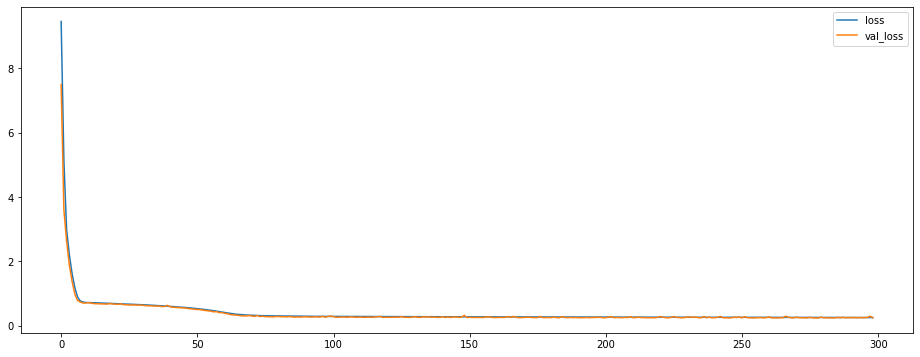

In [120]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Predictions 
- will use the model to make preditions on the Test data

In [121]:
predictions = model.predict(X_test)

### Metrics
- Will use sklearn metrics to test the prediction accuracy for the data

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [123]:
print(explained_variance_score(y_test, predictions))

0.829105830873855


In [124]:
print(mean_absolute_error(y_test, predictions))

0.3844842423566911


In [125]:
print(mean_squared_error(y_test, predictions))

0.24398784670861728


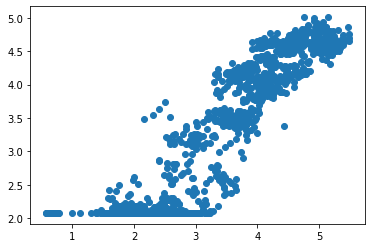

In [126]:
plt.scatter(y_test, predictions)

### Testing in random Data 

In [127]:
from random import randint
random_index = randint(1, len(working_data))
random_day = working_data.drop("^TNX Adj Close", axis=1).iloc[random_index]

In [128]:
random_day

^GSPC    1118.540039
^DJI     9586.959961
^IXIC    1824.729980
^RUT      439.059998
Name: 2001-11-09 00:00:00, dtype: float64

In [129]:
random_day = scalar.transform(random_day.values.reshape(1,4))

In [130]:
model.predict(random_day)

array([[4.759959]], dtype=float32)

In [131]:
working_data.iloc[random_index]

^GSPC             1118.540039
^DJI              9586.959961
^IXIC             1824.729980
^RUT               439.059998
^TNX Adj Close       4.307000
Name: 2001-11-09 00:00:00, dtype: float64

### Model did pretty well predicting the close value for the Ten year yield
- Lets see if the features have predictive capabilities on the the daily returns for the TNX

In [132]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,^TNX Adj Close
Date,,,,,
2001-01-02,1320.280029,10790.919922,2474.159912,483.549988,4.917
2001-01-03,1283.270020,10637.419922,2254.560059,462.489990,5.097
2001-01-04,1347.560059,10944.940430,2593.959961,484.390015,5.013
2001-01-05,1333.339966,10912.809570,2573.110107,477.200012,4.948
2001-01-08,1298.349976,10658.730469,2388.719971,463.140015,4.897
...,...,...,...,...,...
2020-10-13,3534.010010,28764.949219,11901.759766,1647.569946,0.727
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,0.722
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005,0.731


In [133]:
for x in list(working_data.columns):
    working_data[f"{x} returns"] = working_data[f"{x}"].pct_change()

In [135]:
working_data.head()

,^GSPC,^DJI,^IXIC,^RUT,^TNX Adj Close,^GSPC returns,^DJI returns,^IXIC returns,^RUT returns,^TNX Adj Close returns
Date,,,,,,,,,,
2001-01-02,1320.280029,10790.919922,2474.159912,483.549988,4.917,NaN,NaN,NaN,NaN,NaN
2001-01-03,1283.270020,10637.419922,2254.560059,462.489990,5.097,-0.028032,-0.014225,-0.088757,-0.043553,0.036608
2001-01-04,1347.560059,10944.940430,2593.959961,484.390015,5.013,0.050099,0.028909,0.150539,0.047352,-0.016480
2001-01-05,1333.339966,10912.809570,2573.110107,477.200012,4.948,-0.010552,-0.002936,-0.008038,-0.014843,-0.012966
2001-01-08,1298.349976,10658.730469,2388.719971,463.140015,4.897,-0.026242,-0.023283,-0.071660,-0.029464,-0.010307


### Droppping the ADJ Close Columns
- This is due to this column being a perfect predictor for the returns.

In [136]:
working_data.drop("^TNX Adj Close", inplace=True, axis=1)

In [137]:
working_data.head(5)

,^GSPC,^DJI,^IXIC,^RUT,^GSPC returns,^DJI returns,^IXIC returns,^RUT returns,^TNX Adj Close returns
Date,,,,,,,,,
2001-01-02,1320.280029,10790.919922,2474.159912,483.549988,NaN,NaN,NaN,NaN,NaN
2001-01-03,1283.270020,10637.419922,2254.560059,462.489990,-0.028032,-0.014225,-0.088757,-0.043553,0.036608
2001-01-04,1347.560059,10944.940430,2593.959961,484.390015,0.050099,0.028909,0.150539,0.047352,-0.016480
2001-01-05,1333.339966,10912.809570,2573.110107,477.200012,-0.010552,-0.002936,-0.008038,-0.014843,-0.012966
2001-01-08,1298.349976,10658.730469,2388.719971,463.140015,-0.026242,-0.023283,-0.071660,-0.029464,-0.010307


In [139]:
working_data["^TNX Adj Close returns"].mean() * 252

-0.017204462925498383

In [140]:
working_data.dropna(inplace=True)

### Average return for TNX is around 5% 

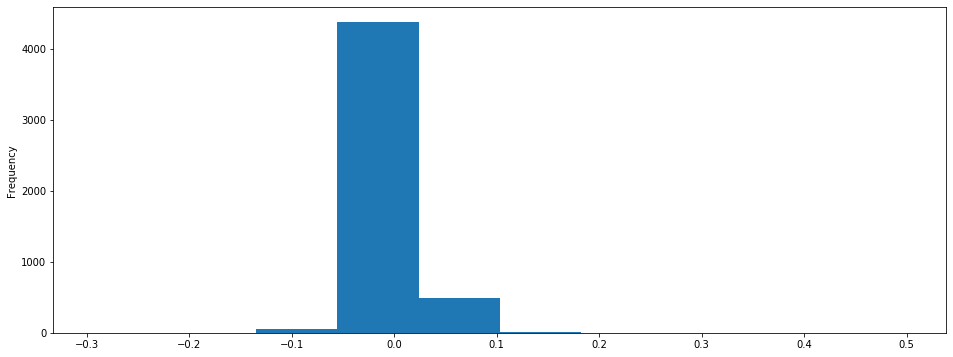

In [142]:
working_data["^TNX Adj Close returns"].plot(kind = "hist", figsize = (16,6))

### Preparing the data

In [143]:
X = working_data.drop("^TNX Adj Close returns", axis=1).values
y = working_data["^TNX Adj Close returns"].values

### Training Testing and Splitting 

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Scaling the data

In [145]:
return_Scale = MinMaxScaler()

In [146]:
X_train = return_Scale.fit_transform(X_train)

In [147]:
X_test = return_Scale.transform(X_test)

## Creating model
- Will use the same eary stopping object as we did above

In [148]:
model = Sequential()
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss= "mse")

In [149]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=350)

Train on 3460 samples, validate on 1483 samples
Epoch 1/350
3460/3460 [==============================] - 2s 442us/sample - loss: 7.0593e-04 - val_loss: 4.6110e-04
Epoch 2/350
3460/3460 [==============================] - 0s 113us/sample - loss: 7.0218e-04 - val_loss: 4.6197e-04
Epoch 3/350
3460/3460 [==============================] - 0s 114us/sample - loss: 7.0227e-04 - val_loss: 4.6171e-04
Epoch 4/350
3460/3460 [==============================] - 0s 113us/sample - loss: 7.0162e-04 - val_loss: 4.6961e-04
Epoch 5/350
3460/3460 [==============================] - 0s 113us/sample - loss: 7.0442e-04 - val_loss: 4.6631e-04
Epoch 6/350
3460/3460 [==============================] - 0s 112us/sample - loss: 7.0330e-04 - val_loss: 4.6102e-04
Epoch 7/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.0337e-04 - val_loss: 4.6408e-04
Epoch 8/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0558e-04 - val_loss: 4.6086e-04
Epoch 9/350
3460/3460 [=========

3460/3460 [==============================] - 0s 114us/sample - loss: 7.0373e-04 - val_loss: 4.6124e-04
Epoch 72/350
3460/3460 [==============================] - 0s 114us/sample - loss: 7.0318e-04 - val_loss: 4.6232e-04
Epoch 73/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0295e-04 - val_loss: 4.6047e-04
Epoch 74/350
3460/3460 [==============================] - 0s 117us/sample - loss: 7.0503e-04 - val_loss: 4.6243e-04
Epoch 75/350
3460/3460 [==============================] - 0s 117us/sample - loss: 7.0337e-04 - val_loss: 4.6156e-04
Epoch 76/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0268e-04 - val_loss: 4.6088e-04
Epoch 77/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.0297e-04 - val_loss: 4.7331e-04
Epoch 78/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.1077e-04 - val_loss: 4.6193e-04
Epoch 79/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0

3460/3460 [==============================] - 0s 121us/sample - loss: 7.0398e-04 - val_loss: 4.6043e-04
Epoch 142/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.0231e-04 - val_loss: 4.6233e-04
Epoch 143/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0291e-04 - val_loss: 4.6484e-04
Epoch 144/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0388e-04 - val_loss: 4.6462e-04
Epoch 145/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.0423e-04 - val_loss: 4.6052e-04
Epoch 146/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0394e-04 - val_loss: 4.6199e-04
Epoch 147/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0347e-04 - val_loss: 4.6055e-04
Epoch 148/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.0353e-04 - val_loss: 4.6048e-04
Epoch 149/350
3460/3460 [==============================] - 0s 116us/sample - l

3460/3460 [==============================] - 0s 128us/sample - loss: 7.0136e-04 - val_loss: 4.7459e-04
Epoch 212/350
3460/3460 [==============================] - 0s 138us/sample - loss: 7.0378e-04 - val_loss: 4.6987e-04
Epoch 213/350
3460/3460 [==============================] - 0s 120us/sample - loss: 7.0240e-04 - val_loss: 4.6047e-04
Epoch 214/350
3460/3460 [==============================] - 0s 119us/sample - loss: 7.0320e-04 - val_loss: 4.6306e-04
Epoch 215/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0477e-04 - val_loss: 4.6163e-04
Epoch 216/350
3460/3460 [==============================] - 0s 117us/sample - loss: 7.0253e-04 - val_loss: 4.6116e-04
Epoch 217/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.0173e-04 - val_loss: 4.6710e-04
Epoch 218/350
3460/3460 [==============================] - 0s 115us/sample - loss: 7.0353e-04 - val_loss: 4.7485e-04
Epoch 219/350
3460/3460 [==============================] - 0s 120us/sample - l

3460/3460 [==============================] - 0s 111us/sample - loss: 7.0688e-04 - val_loss: 4.6138e-04
Epoch 282/350
3460/3460 [==============================] - 0s 112us/sample - loss: 7.0292e-04 - val_loss: 4.6128e-04
Epoch 283/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.0380e-04 - val_loss: 4.6418e-04
Epoch 284/350
3460/3460 [==============================] - 0s 116us/sample - loss: 7.0267e-04 - val_loss: 4.6096e-04
Epoch 285/350
3460/3460 [==============================] - 0s 110us/sample - loss: 7.0258e-04 - val_loss: 4.6938e-04
Epoch 286/350
3460/3460 [==============================] - 0s 110us/sample - loss: 7.0620e-04 - val_loss: 4.6075e-04
Epoch 287/350
3460/3460 [==============================] - 0s 129us/sample - loss: 7.0602e-04 - val_loss: 4.6526e-04
Epoch 288/350
3460/3460 [==============================] - 1s 146us/sample - loss: 7.0418e-04 - val_loss: 4.6060e-04
Epoch 289/350
3460/3460 [==============================] - 0s 128us/sample - l

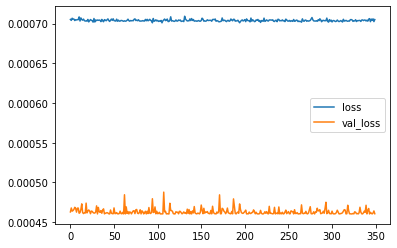

In [80]:
pd.DataFrame(model.history.history).plot()